In [55]:
import pandas
import numpy as np
import pandas as pd

from __future__ import print_function

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score


import matplotlib.pyplot as plt
import matplotlib.cm as cm

%matplotlib inline  
import seaborn as sns

In [56]:
df = pd.read_csv("hUSCensus1990raw50K.csv.bz2",compression = "bz2")

In [57]:
df_demo = pd.DataFrame()


df_demo["AGE"] = df[["AGE"]].copy()
df_demo["INCOME"] = df[["INCOME" + str(i) for i in range(1,8)]].sum(axis = 1)

df_demo["YEARSCH"] = df[["YEARSCH"]].copy()
df_demo["ENGLISH"] = df[["ENGLISH"]].copy()
df_demo["FERTIL"] = df[["FERTIL"]].copy()
df_demo["YRSSERV"] = df[["YRSSERV"]].copy()



df_demo = pd.get_dummies(df_demo, columns = ["ENGLISH", "FERTIL" ])

Number of clusters: 2
Silhouette Coefficient: 0.355
Number of clusters: 2
Silhouette Coefficient: 0.355
Number of clusters: 2
Silhouette Coefficient: 0.355
Number of clusters: 2
Silhouette Coefficient: 0.355
Number of clusters: 2
Silhouette Coefficient: 0.355
Number of clusters: 2
Silhouette Coefficient: 0.355
Number of clusters: 2
Silhouette Coefficient: 0.355
Number of clusters: 2
Silhouette Coefficient: 0.355
Number of clusters: 2
Silhouette Coefficient: 0.355
Number of clusters: 2
Silhouette Coefficient: 0.355
Number of clusters: 3
Silhouette Coefficient: 0.229
Number of clusters: 3
Silhouette Coefficient: 0.229
Number of clusters: 3
Silhouette Coefficient: 0.229
Number of clusters: 3
Silhouette Coefficient: 0.229
Number of clusters: 3
Silhouette Coefficient: 0.229
Number of clusters: 3
Silhouette Coefficient: 0.229
Number of clusters: 3
Silhouette Coefficient: 0.229
Number of clusters: 3
Silhouette Coefficient: 0.229
Number of clusters: 3
Silhouette Coefficient: 0.229
Number of cl

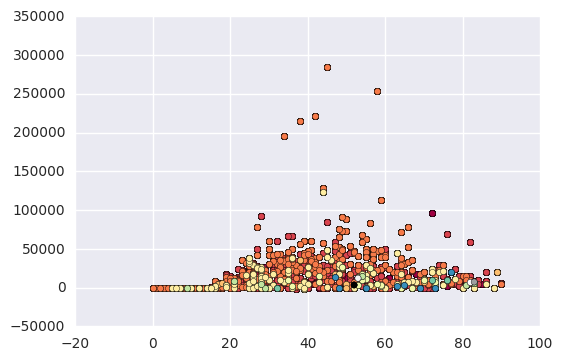

In [61]:
X = df_demo.values[np.random.choice(df_demo.values.shape[0], 1000)]

from sklearn import metrics
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_db = sc.fit_transform(X)


n_clusters = 2
list1 = []
while (n_clusters <= 10):
    for i in range(0,10):
        labels = AgglomerativeClustering(n_clusters = n_clusters).fit_predict(X_db)




        print('Number of clusters: %d' % n_clusters)
        temp = metrics.silhouette_score(X_db, labels)
        list1.append([temp,n_clusters])
        print("Silhouette Coefficient: %0.3f"
              % temp)

        unique_labels = set(labels)
        colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))
        for k, col in zip(unique_labels, colors):
            if k == -1:
                # Black used for noise.
                col = 'k'

            class_member_mask = (labels == k)

            xy = X[class_member_mask]
            plt.scatter(xy[:, 0], xy[:, 1],  c = col, edgecolor='k')

            xy = X[class_member_mask]
            plt.scatter(xy[:, 0], xy[:, 1],  c = col, edgecolor='k')
        
    n_clusters = n_clusters+1

df_clusters = pd.DataFrame(list1)

In [62]:
df_clusters

,0,1
0,0.354852,2
1,0.354852,2
2,0.354852,2
3,0.354852,2
4,0.354852,2
5,0.354852,2
6,0.354852,2
7,0.354852,2
8,0.354852,2
9,0.354852,2


In [63]:
df_clusters.columns=["sc","clusters"]

In [64]:
sns.set_style("darkgrid")

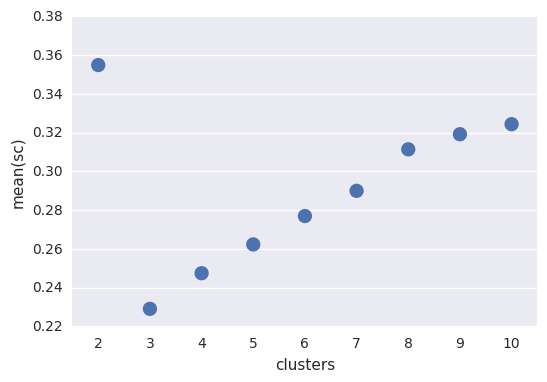

In [65]:
sns.pointplot(x="clusters", y="sc", data=df_clusters, join=False)